In [1]:
import argparse
import os
import tqdm
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

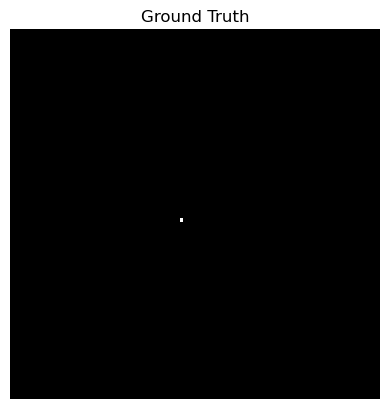

In [32]:
img3d = sitk.ReadImage('/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/projects/cardiac_classifier/output3d/labels/output_image_10.nii.gz')
img3d_fl = sitk.Cast(img3d, sitk.sitkFloat32)
image_np = sitk.GetArrayFromImage(img3d_fl)
image_np.shape

if image_np.ndim == 3:
    middle_slice = image_np[:,:,image_np.shape[-1] // 2]  # Get the middle slice
    plt.imshow(middle_slice, cmap='gray')
else:
    plt.imshow(image_np, cmap='gray')

plt.title('Ground Truth')
plt.axis('off')  # Hide axis for better view
plt.show()

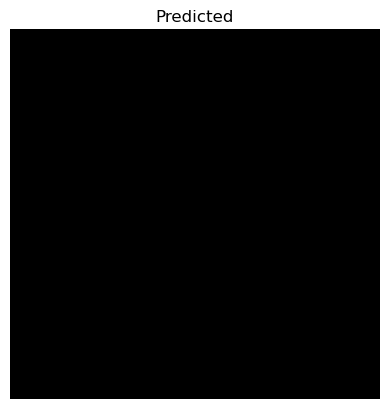

In [30]:
img3d = sitk.ReadImage('/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/projects/cardiac_classifier/output/preds/output_image_10.nii.gz')
img3d_fl = sitk.Cast(img3d, sitk.sitkFloat32)
image_np = sitk.GetArrayFromImage(img3d_fl)

if image_np.ndim == 3:
    middle_slice = image_np[:,:,image_np.shape[-1] // 2]  # Get the middle slice
    plt.imshow(middle_slice, cmap='gray')
else:
    plt.imshow(image_np, cmap='gray')

plt.title('Predicted')
plt.axis('off')  # Hide axis for better view
plt.show()

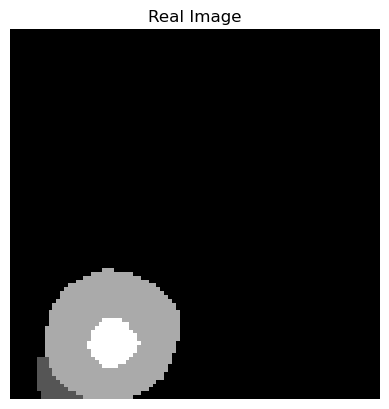

In [53]:
path = '/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/data/ACDC/database/testing/patient123/patient123_frame11_gt.nii.gz'
img3d = sitk.ReadImage(path)
img3d_fl = sitk.Cast(img3d, sitk.sitkFloat32)
image_np = sitk.GetArrayFromImage(img3d_fl)
image_np.shape

if image_np.ndim == 3:
    middle_slice = image_np[5,50:146,50:146]  # Get the middle slice
    plt.imshow(middle_slice, cmap='gray')
else:
    plt.imshow(image_np, cmap='gray')

plt.title('Real Image')
plt.axis('off')  # Hide axis for better view
plt.show()

In [49]:
def resize_image(img, new_size):
    """
    Resize a 3D image to new_size.
    """
    size = img.GetSize()
    spacing = img.GetSpacing()
    new_spacing = [osz * osp / nsp for osz, osp, nsp in zip(size, spacing, new_size)]

    resampler = sitk.ResampleImageFilter()
    resampler.SetSize(new_size)
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetOutputDirection(img.GetDirection())
    resampler.SetOutputOrigin(img.GetOrigin())
    resampler.SetTransform(sitk.Transform())
    resampler.SetDefaultPixelValue(img.GetPixelIDValue())
    resampler.SetInterpolator(sitk.sitkBSpline)

    return resampler.Execute(img)
path = '/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/data/ACDC/database/testing/patient118/patient118_frame10.nii.gz'
img3d = sitk.ReadImage(path)
img3d_fl = sitk.Cast(img3d, sitk.sitkFloat32)
image_np = sitk.GetArrayFromImage(img3d_fl)
image_np.shape
img3d.GetDirection()

(1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0)

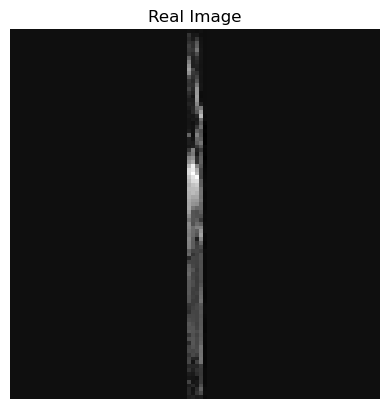

In [47]:
img = np.load('/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/data/ACDC/database/data/test_sample_139.npy',allow_pickle=True)
img = img.item()['image']



middle_slice = img[5,:,:]  # Get the middle slice
plt.imshow(middle_slice, cmap='gray')


plt.title('Real Image')
plt.axis('off')  # Hide axis for better view
plt.show()

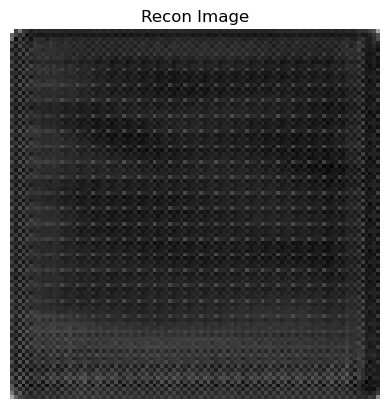

In [22]:
path = '/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/projects/cardiac_autoencoder/Recons/output_image_10.nii.gz'
img3d = sitk.ReadImage(path)
img3d_fl = sitk.Cast(img3d, sitk.sitkFloat32)
image_np = sitk.GetArrayFromImage(img3d_fl)

if image_np.ndim == 3:
    middle_slice = image_np[:,:,image_np.shape[-1] // 2]  # Get the middle slice
    plt.imshow(middle_slice, cmap='gray')
else:
    plt.imshow(image_np, cmap='gray')

plt.title('Recon Image')
plt.axis('off')  # Hide axis for better view
plt.show()

In [27]:
import pandas as pd
pd.read_csv('/rds/projects/c/chenhp-dpmodel/2024-miccai-dgm-daum/projects/cardiac_autoencoder/Test_Metrics.csv',index_col=0)

,MSE,LPIPS,SSIM,Latent_Std,Latent_Mean,DICE
0,0.002439,0.314949,0.790529,0.96789,0.247764,0.082342
